In [22]:
pip install pyproj

In [ ]:
!pip install geopandas

In [ ]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.5
Uninstalling Cython-3.0.5:
  Successfully uninstalled Cython-3.0.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.4 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.2
Uninstalling shapely-2.0.2:
  Successfully uninstalled shapely-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.2-cp310-cp310-linux_x86_64.whl size=1027124 sha256=eb27b520aad314bc7728488b74e2bcc60d4a19c68690e9ce051549fba24dcb19
  Stored in directory: /root/.cache/pip/wheels/1f/6b/52/14cb4558cddc0fd89de08f0e1fd08f816f4f3e1969311377c6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
li

In [ ]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time


ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Se formatean los datos de fecha
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT


In [ ]:
dfCoord=df[['longitud', 'latitud']].copy()
dfCoord

,longitud,latitud
0,-73.102501,7.076011
1,-73.105400,7.079495
2,-73.091003,7.090290
3,-73.090958,7.067435
4,-73.104980,7.066905
...,...,...
1257,-73.099487,7.072610
1258,-73.103607,7.065252
1259,-73.103264,7.091391
1260,-73.097000,7.061083


In [ ]:
#Ver si hay nulos
dfCoord.isnull().sum()

longitud    0
latitud     0
dtype: int64

In [ ]:
#Ver si hay nan
dfCoord.isna().sum()

longitud    0
latitud     0
dtype: int64

In [ ]:
# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

In [ ]:
#Filtrar valores que salen del mapa
dfCoord=dfCoord[(dfCoord['longitud']>=lower_lon)&(dfCoord['longitud']<=upper_lon)&(dfCoord['latitud']>=lower_lat)&(dfCoord['latitud']<=upper_lat)]
dfCoord

,longitud,latitud
0,-73.102501,7.076011
1,-73.105400,7.079495
2,-73.091003,7.090290
3,-73.090958,7.067435
4,-73.104980,7.066905
...,...,...
1257,-73.099487,7.072610
1258,-73.103607,7.065252
1259,-73.103264,7.091391
1260,-73.097000,7.061083


In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

#Se convertirán las coordenadas geográficas a UTM
dfCoord['x'], dfCoord['y'] = P(dfCoord['longitud'], dfCoord['latitud'])
dfCoord

,longitud,latitud,x,y
0,-73.102501,7.076011,709584.027559,782579.281866
1,-73.105400,7.079495,709262.121378,782963.354103
2,-73.091003,7.090290,710847.924654,784163.825097
3,-73.090958,7.067435,710863.366771,781635.895608
4,-73.104980,7.066905,709314.159319,781570.969374
...,...,...,...,...
1257,-73.099487,7.072610,709918.546763,782204.438977
1258,-73.103607,7.065252,709466.644754,781388.734012
1259,-73.103264,7.091391,709492.782783,784279.996264
1260,-73.097000,7.061083,710198.574916,780930.648555


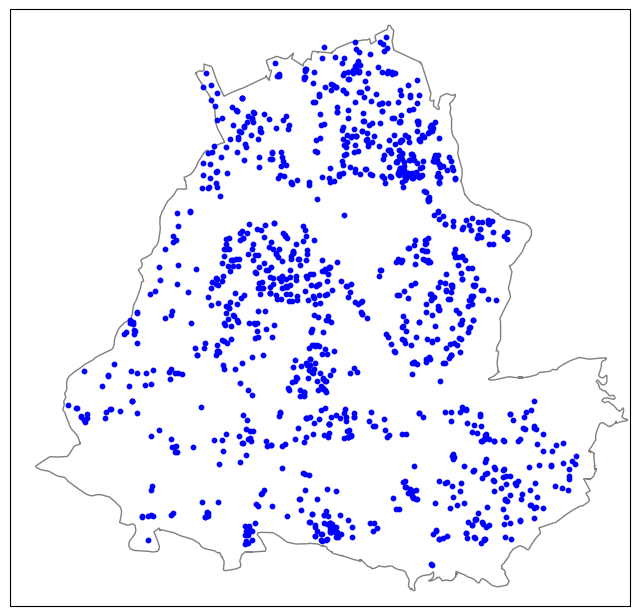

In [ ]:
#Se carga la cartografía de Floridablanca
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(dfCoord['longitud'], dfCoord['latitud'], zorder=10, c='b', s=10)

plt.show()

In [ ]:
# Matriz de conteos

def divideDistance(a,b,resolucion):
  c=(a-b)/resolucion
  return c


def countingMatrix(resolucion):
  #Puntos maximos y minimos
  xmax=dfCoord['x'].max()
  xmin=dfCoord['x'].min()
  ymax=dfCoord['y'].max()
  ymin=dfCoord['y'].min()

  #obtener filas y columnas
  columnas=math.ceil(divideDistance(xmax,xmin,resolucion))
  filas=math.ceil(divideDistance(ymax,ymin,resolucion))
  print(columnas, filas)

  #Llenar matriz de ceros
  matriz=[]
  matriz = [[0 for _ in range(columnas)] for _ in range(filas)]

  #Recorrer dataframe
  for indice, fila in dfCoord.iterrows():
    columna=math.floor(divideDistance(fila['x'],xmin,resolucion))
    fila=math.floor(divideDistance(fila['y'],ymin,resolucion))
    matriz[fila][columna] = matriz[fila][columna]+1
  return matriz



#definir resolucion
resolucion=10


#Crear matriz
matriz=countingMatrix(resolucion)
matriz=np.flipud(matriz)
for fila in matriz:
    print(fila)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

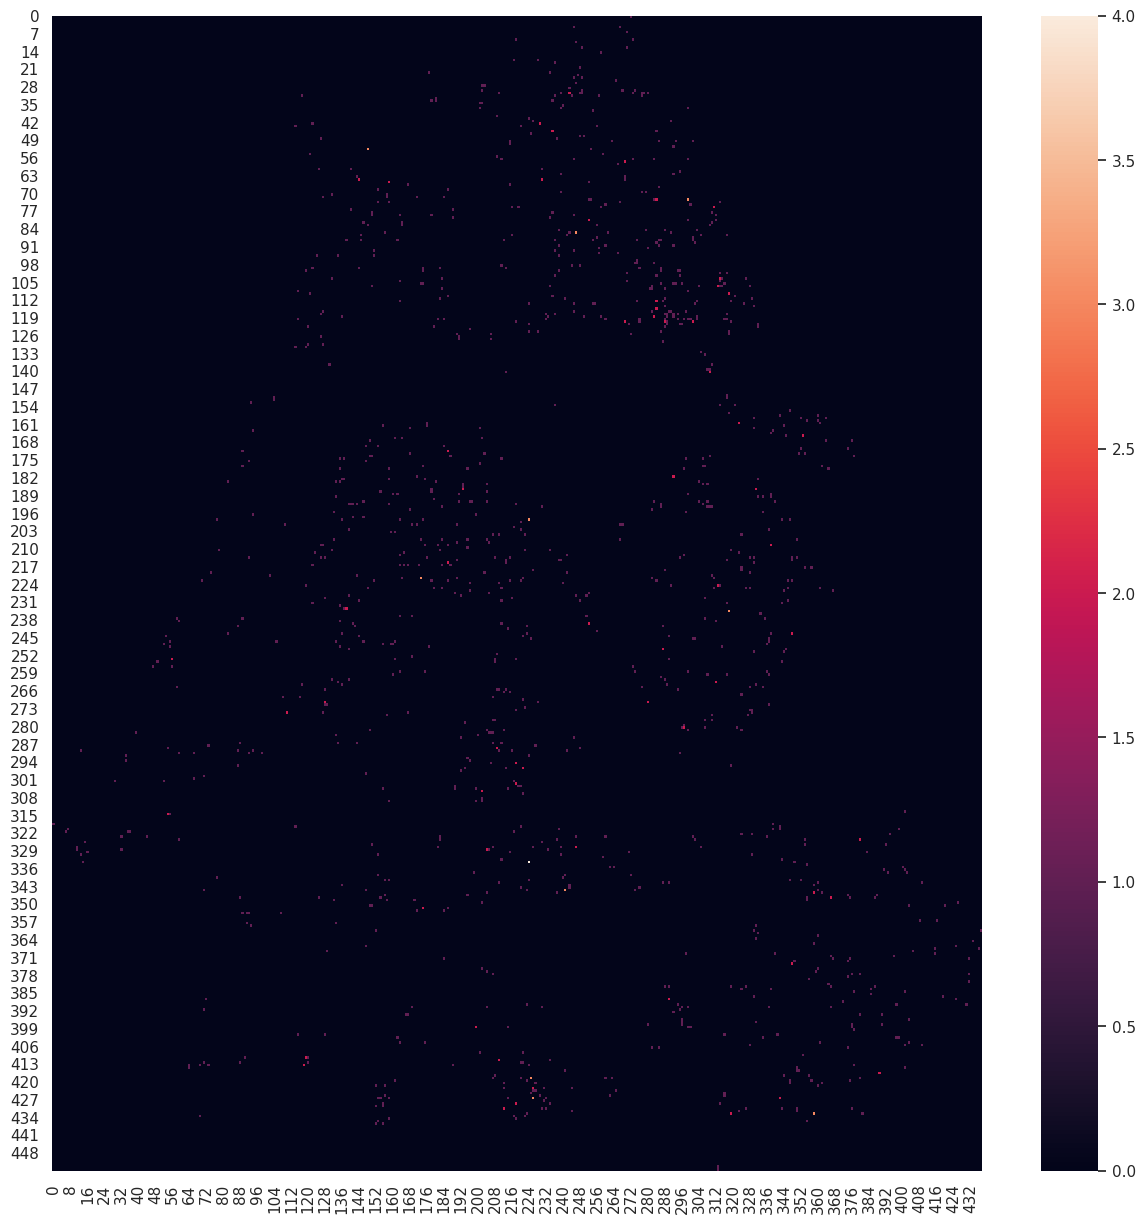

In [ ]:
#Visualizacion de datos
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
p=sns.heatmap(matriz)

In [ ]:
#Obtener filas y columnas de la matriz
rows=len(matriz)
cols=len(matriz[0])
print(cols, rows)

438 455


In [ ]:
#Calcular distancia con teorema de Pitágoras
def pitDist(x1,y1,x2,y2):
  d=math.sqrt(((x2-x1)**2)+((y2-y1)**2))
  return d


#Crear las funciones de kernel

def uniforme(d,r):
  k=1
  return k

def triangular(d,r):
  k=1-(d/r)
  return k

def gaussiana(d,r):
  k=(math.e)**(-((d**2)/(2*(r**2))))
  return k

def epanechnikov(d,r):
  k=1-((d**2)/(r**2))
  return k

def exponencial(d,r):
  k=(math.e)**(-(d/r))
  return k

def coseno(d,r):
  k=math.cos((math.pi*d)/(2*r))
  return k

def kernel(tipo, d, r):
  if tipo == "uniforme":
    k=uniforme(d,r)
  elif tipo == "triangular":
    k=triangular(d,r)
  elif tipo == "gaussiana":
    k=gaussiana(d,r)
  elif tipo == "epanechnikov":
    k=epanechnikov(d,r)
  elif tipo == "exponencial":
    k=exponencial(d,r)
  elif tipo == "coseno":
    k=coseno(d,r)
  else:
    k=0
  kernel=k/(math.pi*(r**2))
  return kernel

In [ ]:
def KDE(tipo, resolucion, ancho_banda, cMatrix):
  #Llenar matriz de ceros
  dMatrix=[]
  dMatrix = [[0 for _ in range(cols)] for _ in range(rows)]
  r=math.ceil(ancho_banda/resolucion)

  for i in range (rows):
    y_ini=i-r
    y_fin=i+r
    if (y_ini<0):
      y_ini=0
    if (y_fin>rows):
      y_fin=rows

    for j in range (cols):
      x_ini=j-r
      x_fin=j+r
      if (x_ini<0):
        x_ini=0
      if (x_fin>cols):
        x_fin=cols

      for k in range (y_ini, y_fin):
        for l in range (x_ini, x_fin):
          distancia=pitDist(i,j,k,l)
          if (distancia<=r):
            dMatrix[i][j]+=(cMatrix[k][l]*kernel(tipo,(distancia*r),ancho_banda))

  return dMatrix

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

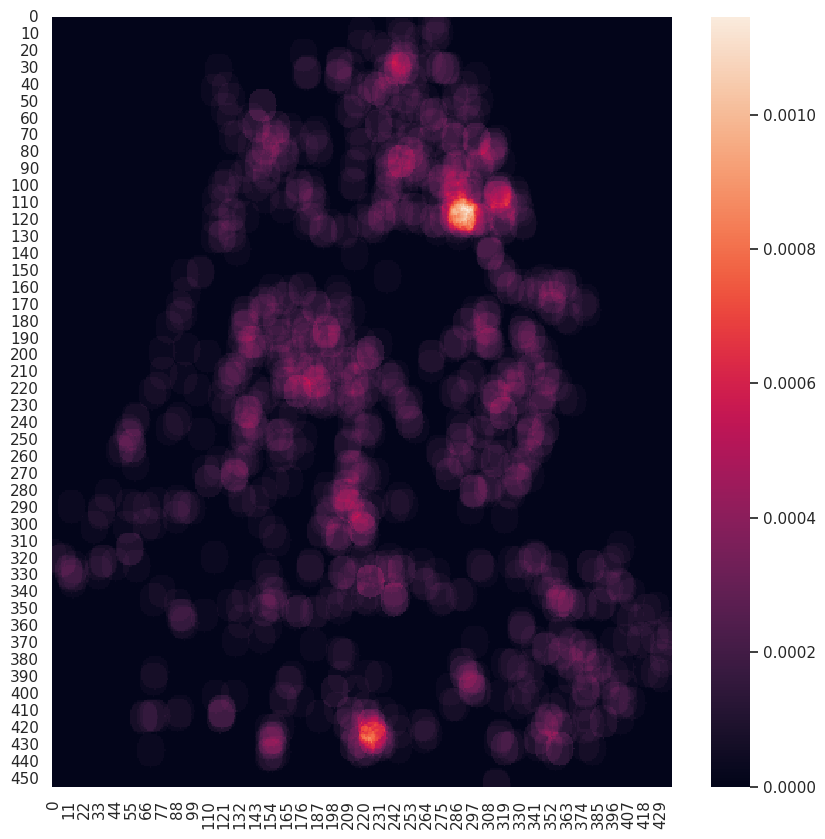

In [ ]:
ancho_banda=100
tipo="uniforme"


#Crear matriz
matrizDensidad=KDE(tipo,resolucion, ancho_banda, matriz)
for fila in matrizDensidad:
    print(fila)


#Visualizacion de datos
sns.set(rc = {'figure.figsize':(10,10)})
p=sns.heatmap(matrizDensidad)

In [ ]:
suma=0
for fila in matrizDensidad:
    for elemento in fila:
        suma += elemento

# Imprimir el resultado
print("La suma de todos los números en la matriz es:", suma)

La suma de todos los números en la matriz es: 12.612551775190575


In [24]:
# Implementación de colores

import colorsys

def rgb_a_hsv(r, g, b):
  (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
  return (h, s, v)

def hsv_a_rgb(h, s, v):
  (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
  r = int(r)
  g = int(g)
  b = int(b)
  return (r, g, b)


from PIL import Image, ImageDraw

def pintar_color(r, g, b):
  img = Image.new('RGB', (300, 25))
  draw = ImageDraw.Draw(img)
  draw.rectangle([(0, 0), img.size], fill = (r,g,b))
  display(img)

n = 10

In [25]:

def gama_colores(color_ini, color_fin, n_colores):
  t_ini = rgb_a_hsv(color_ini[0], color_ini[1], color_ini[2])
  h_ini = t_ini[0]
  s_ini = t_ini[1]
  v_ini = t_ini[2]

  t_fin = rgb_a_hsv(color_fin[0], color_fin[1], color_fin[2])
  h_fin = t_fin[0]
  s_fin = t_fin[1]
  v_fin = t_fin[2]

  lista_colores = []
  for i in range(n_colores):
    h = h_ini + (i * (h_fin - h_ini) / (n - 1))
    s = s_ini + (i * (s_fin - s_ini) / (n - 1))
    v = v_ini + (i * (v_fin - v_ini) / (n - 1))
    t_rgb = hsv_a_rgb(h, s, v)
    lista_colores.append((t_rgb[0], t_rgb[1], t_rgb[2]))

  return lista_colores


In [26]:
lista_colores = gama_colores((255,255,0), (255,0,0), 10)
print(lista_colores)

[(255, 255, 0), (255, 226, 0), (255, 198, 0), (255, 170, 0), (255, 141, 0), (255, 113, 0), (255, 84, 0), (255, 56, 0), (255, 28, 0), (255, 0, 0)]


In [27]:
for i in range(len(lista_colores)):
  pintar_color(lista_colores[i][0], lista_colores[i][1], lista_colores[i][2])

In [28]:
# Crear una lista plana de la matriz excluyendo los valores iguales a 0
densidades_array = [valor for fila in matrizDensidad for valor in fila if valor != 0]

# Encontrar el valor más pequeño (diferente de 0) en la lista
d_min = min(densidades_array)

# Encontrar el valor más grande (diferente de 0) en la lista
d_max = max(densidades_array)

# Imprimir los resultados
print("Valor más pequeño:", d_min)
print("Valor más grande:", d_max)

Valor más pequeño: 3.183098861837907e-05
Valor más grande: 0.0011459155902616462


In [29]:
paso=(d_max-d_min)/n

lista_rangos=[]
for i in range(n):
  lista_rangos.append(d_min+(paso*i))

print(lista_rangos)
print(len(lista_rangos))

[3.183098861837907e-05, 0.0001432394487827058, 0.0002546479089470325, 0.00036605636911135923, 0.0004774648292756859, 0.0005888732894400126, 0.0007002817496043394, 0.0008116902097686661, 0.0009230986699329928, 0.0010345071300973195]
10


In [30]:
def asignar_color(valor, rangos, colores):
    # Verificar si el valor es menor al primer rango
    if valor < rangos[0]:
        return (255, 255, 255)  # Asignar el color blanco

    # Verificar en qué rango cae el valor
    for i, rango in enumerate(rangos):
        if valor >= rango and (i == len(rangos) - 1 or valor < rangos[i + 1]):
            return colores[i]

    # Si el valor es mayor o igual al último rango, asignar el color del último rango
    return colores[-1]

In [32]:
#Crear matriz de colores

def matrizColores(paleta, matrDens, rangos):
  matrColors=[]
  for fila in range(len(matrDens)):
    array=[]
    for columna in range(len(matrDens[0])):
      valor=matrDens[fila][columna]
      color_asignado=asignar_color(valor, rangos, paleta)
      array.append(color_asignado)
    matrColors.append(array)
  return matrColors

matrizColor=matrizColores(lista_colores,matrizDensidad, lista_rangos)

In [34]:
from PIL import Image

# Tamaño de la imagen basado en las dimensiones de la matriz
ancho = len(matrizColor[0])  # Número de columnas
alto = len(matrizColor)     # Número de filas

# Crear una nueva imagen con fondo blanco y canal alfa
heatmap = Image.new("RGBA", (ancho, alto), (255, 255, 255, 0))

# Obtener un objeto de píxeles para la imagen
pixeles = heatmap.load()

# Aplicar los valores RGB de la matriz a la imagen
for y in range(alto):
    for x in range(ancho):
        # Obtener los valores RGB de la matriz
        r, g, b = matrizColor[y][x]

        # Ajustar el canal alfa según el color
        canal_alfa = 0 if (r, g, b) == (255, 255, 255) else 150

        # Asignar los valores RGB y el canal alfa a la imagen
        pixeles[x, y] = (r, g, b, canal_alfa)

# Guardar la imagen resultante
heatmap.save("heatmap.png")

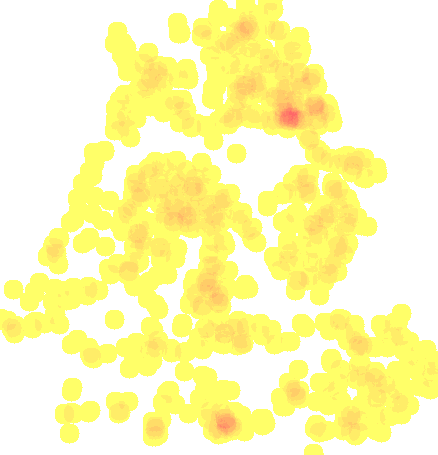

In [35]:
heatmap